Name: Sharmin

Labpartner(s): Zachary Laird

In [3]:
#import statements go here
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 7.1

For today's lab you will need to download Davinci Resolve: https://www.blackmagicdesign.com/products/davinciresolve
It will take some time

Today we are going to go over cartopy a bit more, Victoria is giving a demo on how to make movies, and you will start the Pandas course in Datacamp.

Note that due date for Lab 6.2 is on Thursday. Take your time and ask questions.

Also note that your project topic is due 10/13. There is an assignment tab up in moodle to turn this in.

# Warmups 7.1

**W.1** Play around with some map projections in cartopy. 

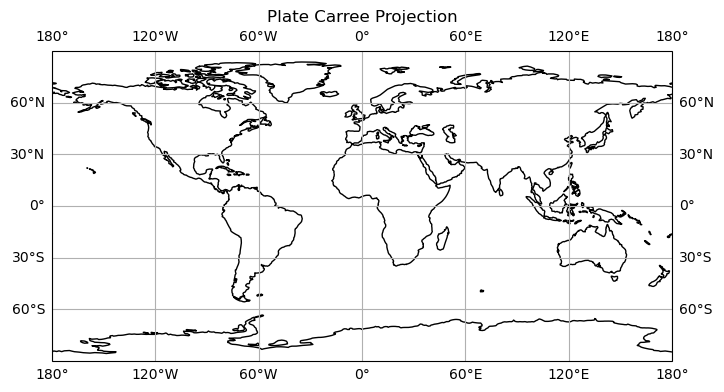

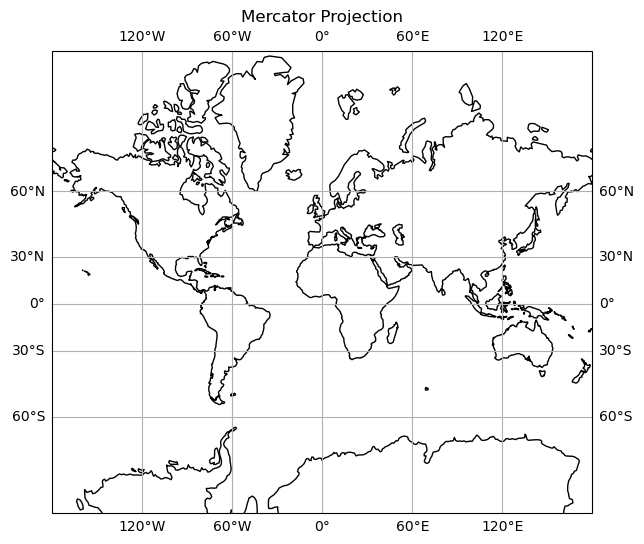

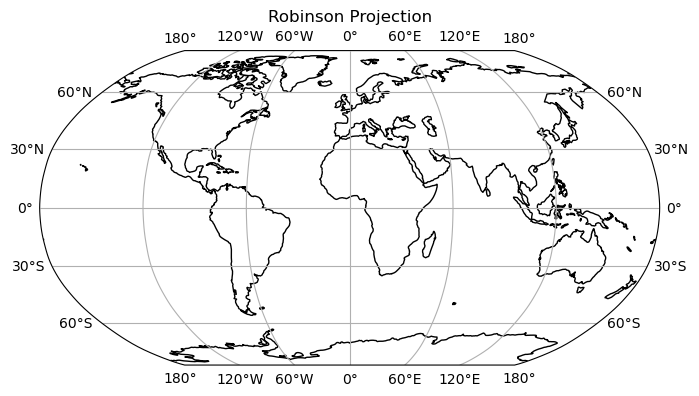

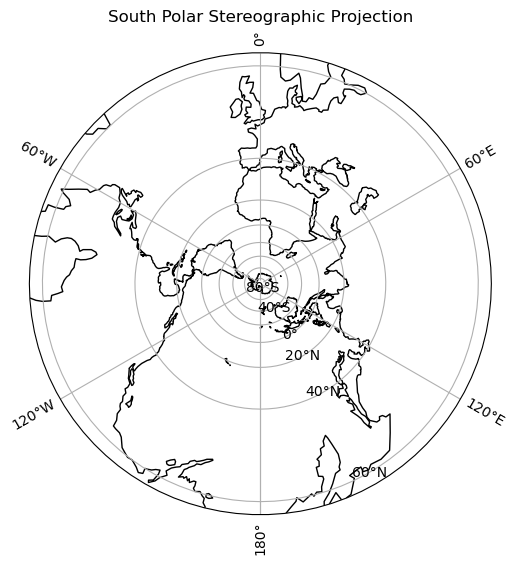

In [12]:
def plot_projections(projection, title):
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection=projection)
    ax.coastlines()
    ax.set_global()   
    ax.gridlines(draw_labels=True)  
    plt.title(title)
    plt.show()

# 1. Plate Carree (Equirectangular projection)
plot_projections(ccrs.PlateCarree(), "Plate Carree Projection")

# 2. Mercator Projection (common for web maps)
plot_projections(ccrs.Mercator(), "Mercator Projection")

# 3. Robinson Projection (compromise projection, often used in world maps)
plot_projections(ccrs.Robinson(), "Robinson Projection")

# 4. South Polar Stereographic Projection (focused on the South Pole)
plot_projections(ccrs.SouthPolarStereo(), "South Polar Stereographic Projection")


**W.2** See if you can make a nice map of Antarctica. Bonus if you can label McMurdo Station

(-2800000.0, 2800000.0)

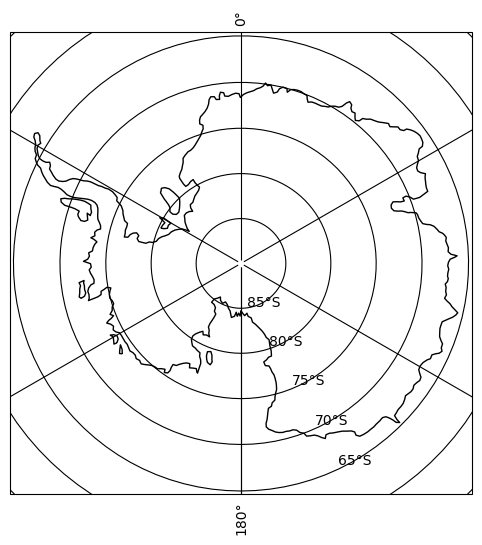

In [14]:
# from https://github.com/thomasteisberg/glaciology-util/blob/master/loading_data/Plotting%20Antarctic%20Datasets.ipynb
crs_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

fig, ax = plt.subplots(figsize=(8,6), facecolor='white', subplot_kw=dict(projection=crs_3031)) # Create our plot

ax.coastlines(resolution='110m', color='k') # Add coastlines
gl = ax.gridlines(draw_labels=True, color='k') # Add gridlines to make latitudes/longitudes
gl.ylabel_style = {'color': 'k'} # The latitudes are shown inside the plot, so they need to be white for visibility

ax.set_aspect('equal')
ax.set_xlim(-2.8e6,2.8e6) # Quick note here: If you use set_(x/y)lim, you're setting the limits in projected coordinates.
ax.set_ylim(-2.8e6,2.8e6) #                  If you prefer, you can use ax.set_extent to set the limits in any coordinate system you want.


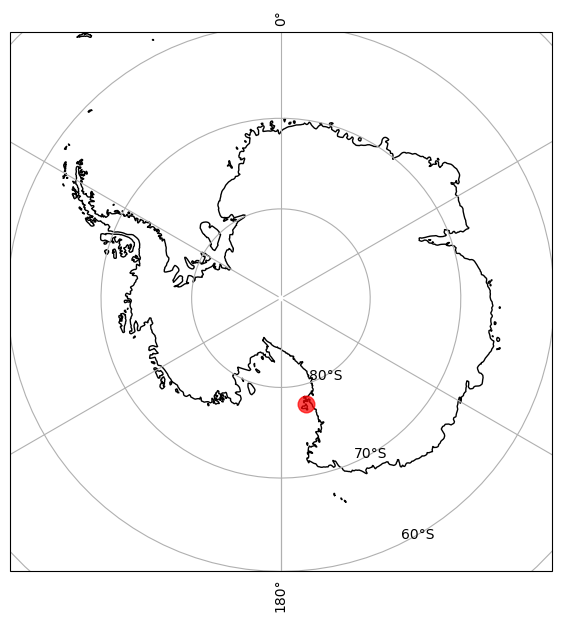

In [21]:
# from https://fabienmaussion.info/climate_system/projects/04_Getting_started_Antarctica.html

#McMurdo Station
# 77 degrees 51 minutes S, 166 degrees 40 minutes E,
lat = -77-51/60
lon = 166+40/60

# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
#z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines()
ax.gridlines(draw_labels=True)

# add in McMurdo
ax.plot(lon, lat, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())

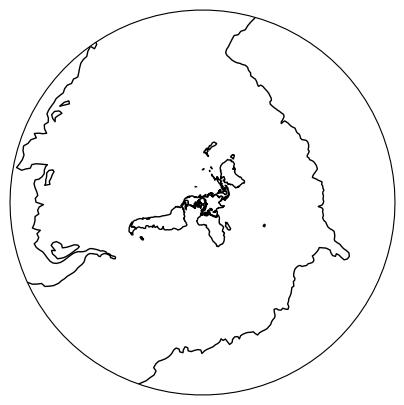

In [18]:
# first attempt 
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo(true_scale_latitude=0))
ax.coastlines(resolution='110m')
#ax.gridlines()

# Lecture 7.1

### Agenda:

- Questions
- Go over some cartopy from last time (6.2 corrected lab on github)
- Movie demo from Victoria (see movie_demo_2024 notebook on github)

### Questions

- See Lab 6.2 corrected versi0n
- See movie_demo_2024 notebook

# Lab 7.1

**E.1** Complete Data Manipulation with Pandas Ch 1-2 in datacamp. I'm assigning all of this course to the class, as many of you have .csv type data that works well with Pandas. If you don't have data that Pandas is useful for, come see me and we can talk about an alternate assignment.


Ans: Completed

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [ ]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())
ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")

In [ ]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())

In [ ]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates["date"])

In [ ]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of stores for each department and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of stores in each department and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

In [ ]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A / sales_all, sales_B / sales_all, sales_C / sales_all]
print(sales_propn_by_type)

In [ ]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

In [ ]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")
# Print mean_sales_by_type
print(mean_sales_by_type)

# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

This week's project:

**E.3** Make two data animations using both the methods that Victoria demonstrated. You can use some of the model data we have been looking at, or animate a plot of your data, or whatever scientific thing you like. The goal here is to get familiar with the animation methods and tell a story using data. You will present this to the class next Tuesday (remember 10/17 is a holiday). Add your animations to this ppt: https://lsu.box.com/s/e99nkcr3nyds4r4gswilxgol5q6lbz5l

In [23]:
import xarray as xr
# make sure you also have nectdf4 installed!

In [25]:
# download the file by clicking on the https server link and putting the correct path
file_path= r"C:\Users\anany\Downloads\1ST SEMESTER\OCS 4001 CHERYL HARRISON\LAB SUBMISSIONS\6.2\gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc"

In [27]:
data = xr.open_dataset(file_path, decode_times=False)

In [31]:
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [37]:
lat_min = data.lat.min()
print(lat_min)

<xarray.DataArray 'lat' ()>
array(-89.75)


In [39]:
lat_max = data.lat.max()
print(lat_max)

<xarray.DataArray 'lat' ()>
array(89.75)


In [41]:
lon_min = data.lon.min()
print(lon_min)

<xarray.DataArray 'lon' ()>
array(-179.75)


In [43]:
lon_max = data.lon.max()
print(lon_max)

<xarray.DataArray 'lon' ()>
array(179.75)


In [51]:
#save_location = r"C:/Users/anany/Downloads/1ST SEMESTER/OCS 4001 CHERYL HARRISON/LAB SUBMISSIONS/7.1/"
save_location = r"C:/Users/anany/Downloads/1ST SEMESTER/OCS 4001 CHERYL HARRISON/LAB SUBMISSIONS/7.1/Global air temp/"
file_name = 'Global_air_temperature'

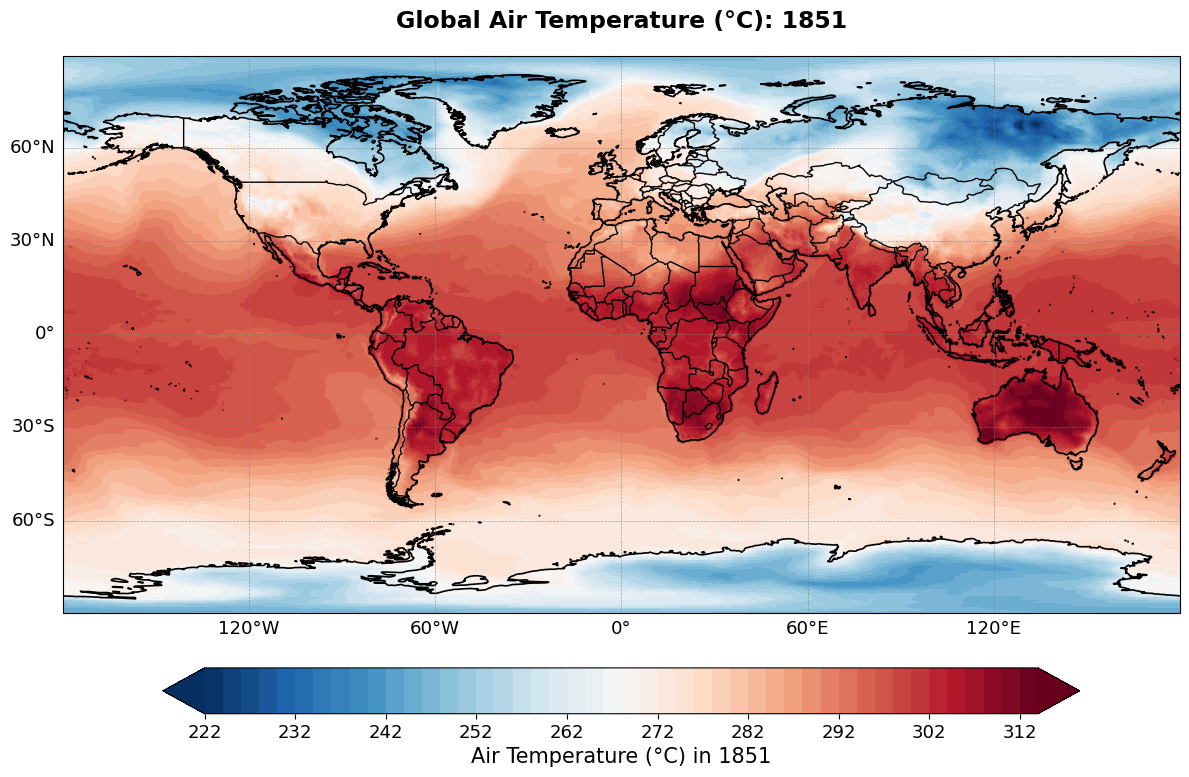

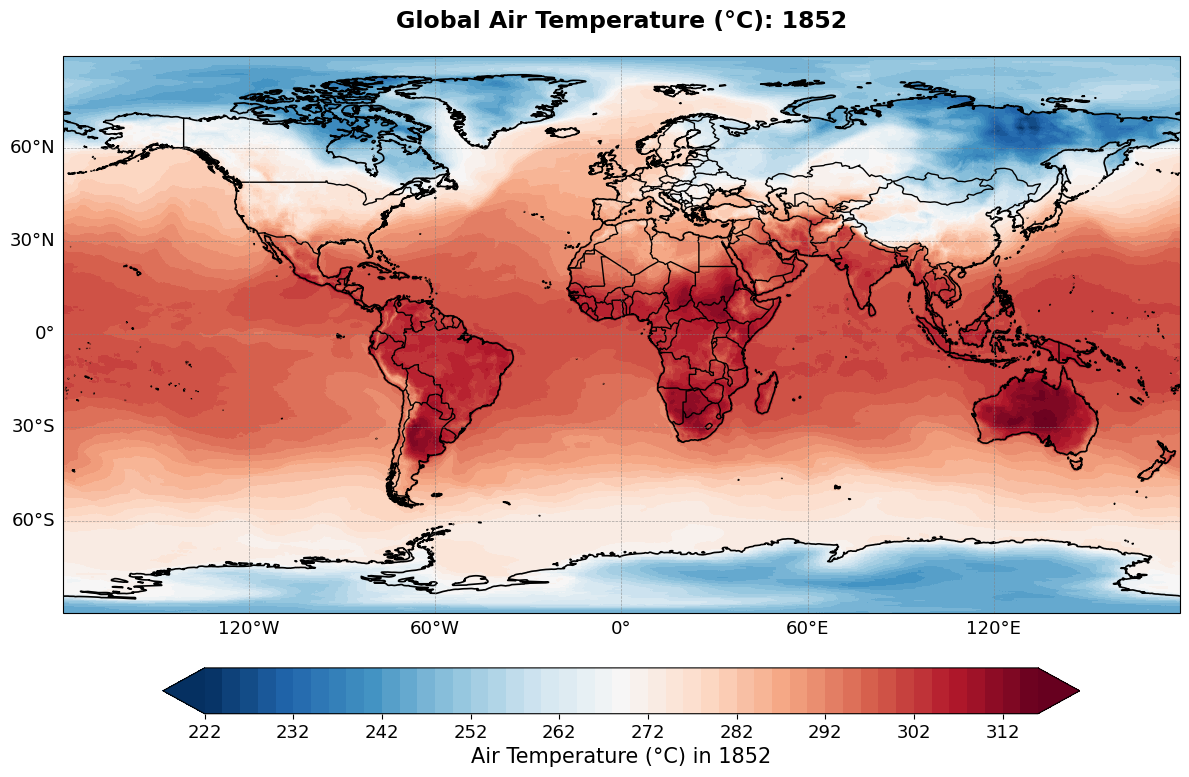

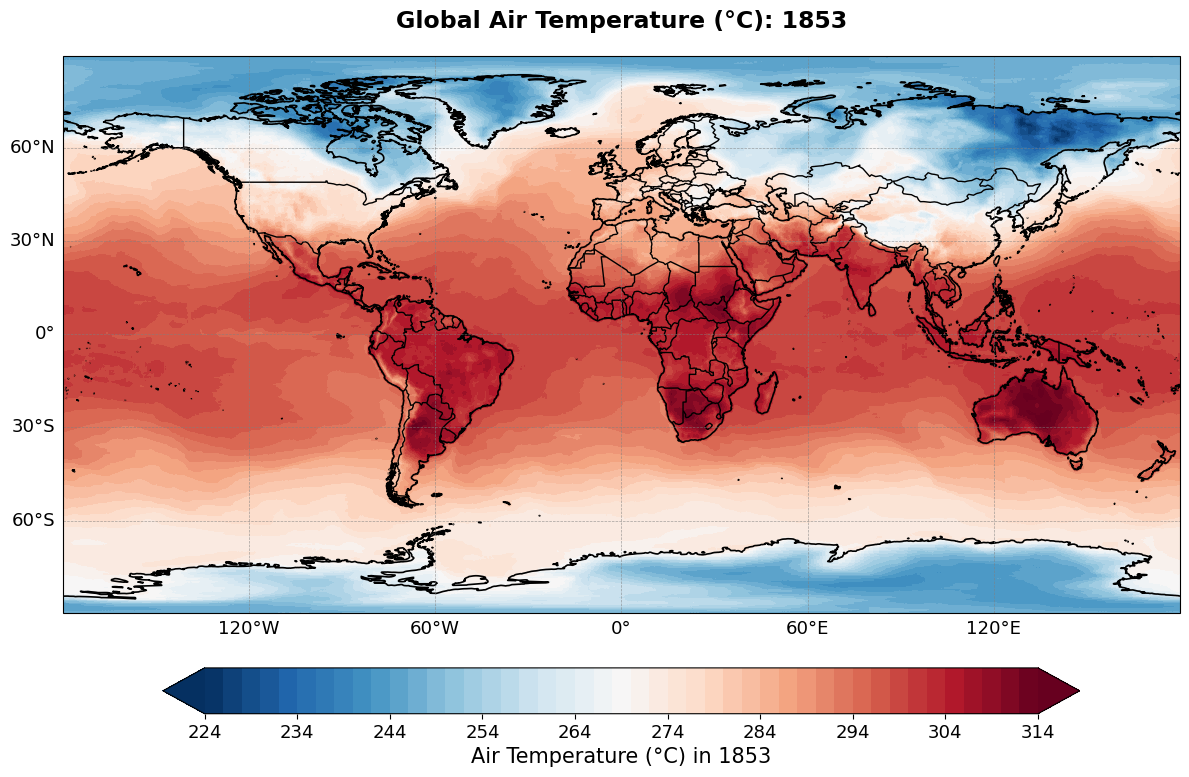

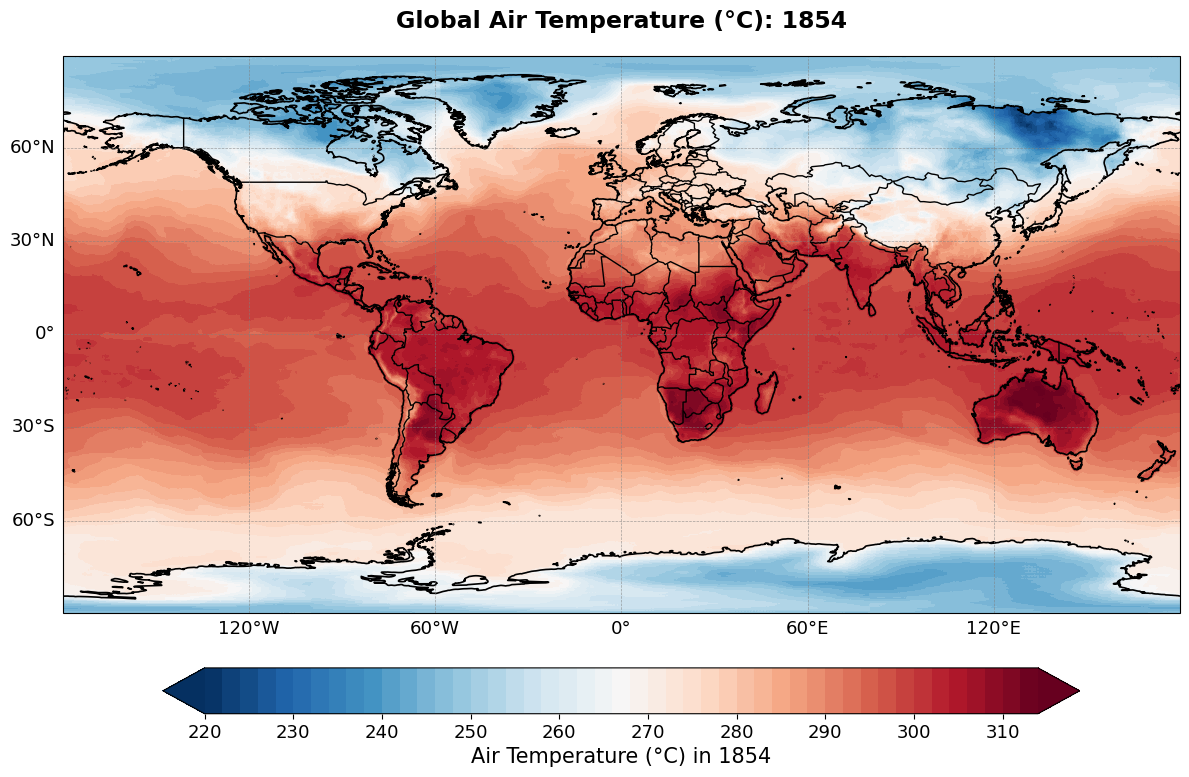

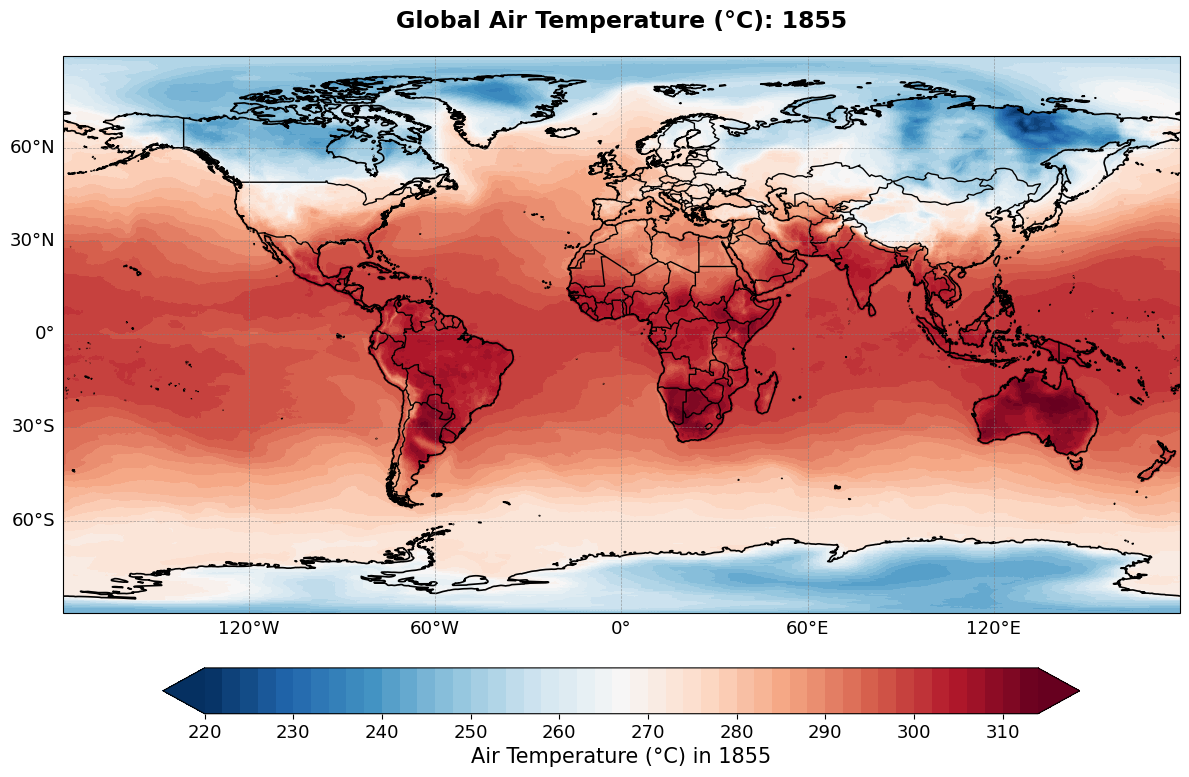

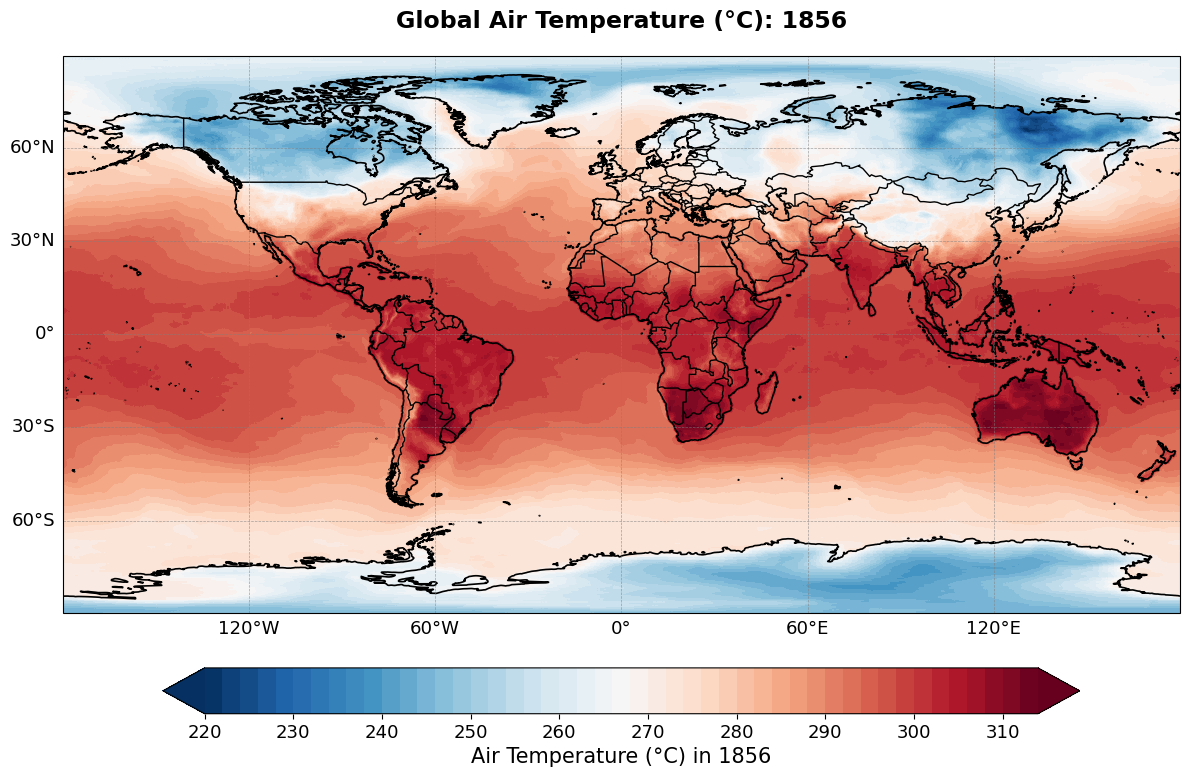

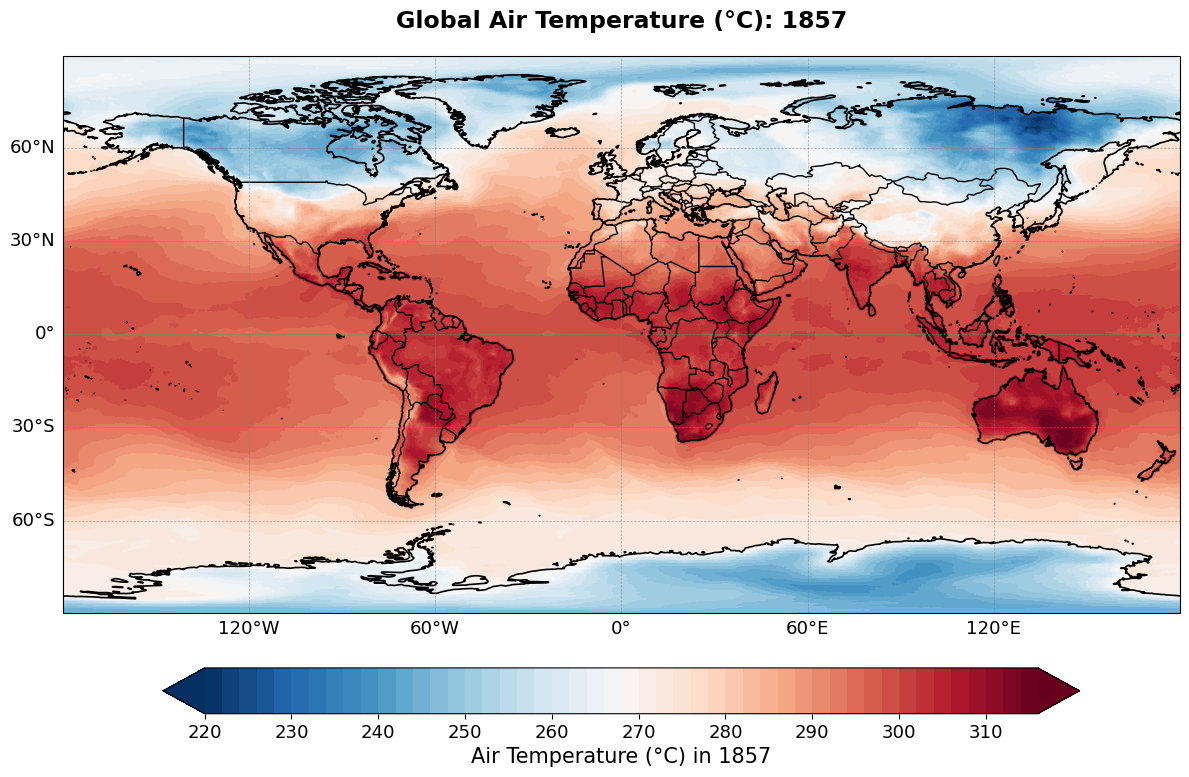

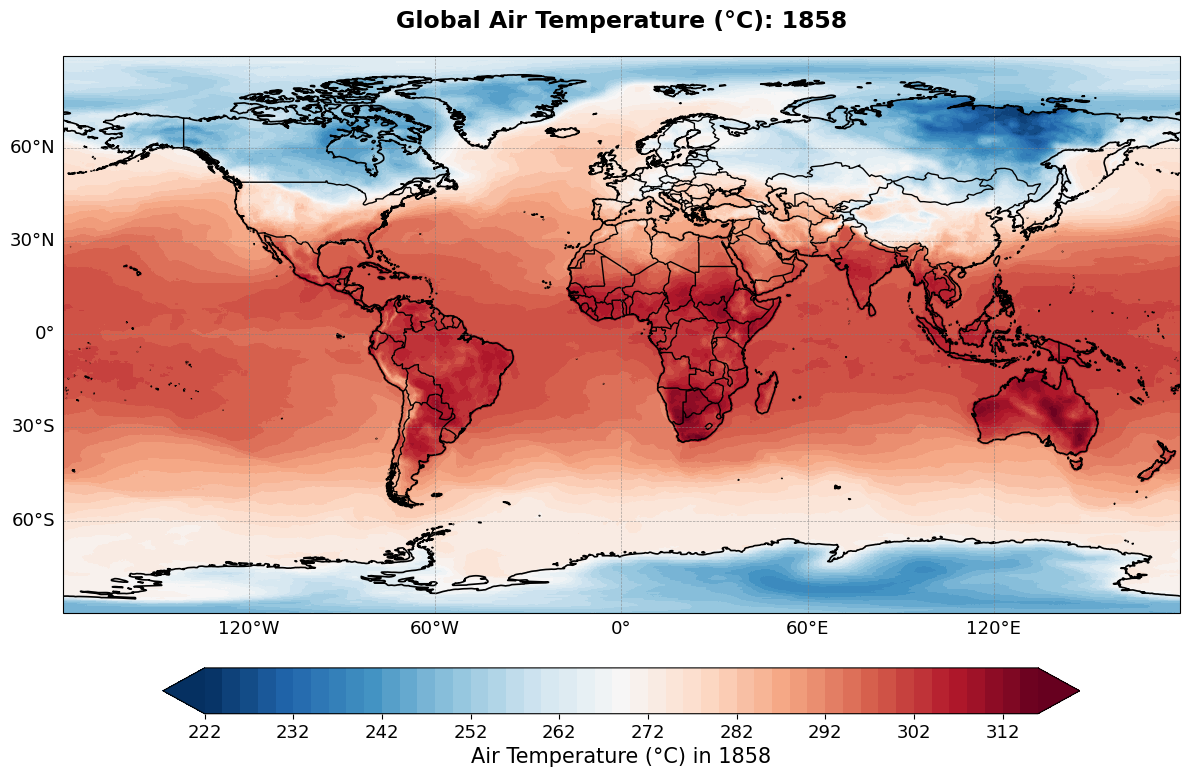

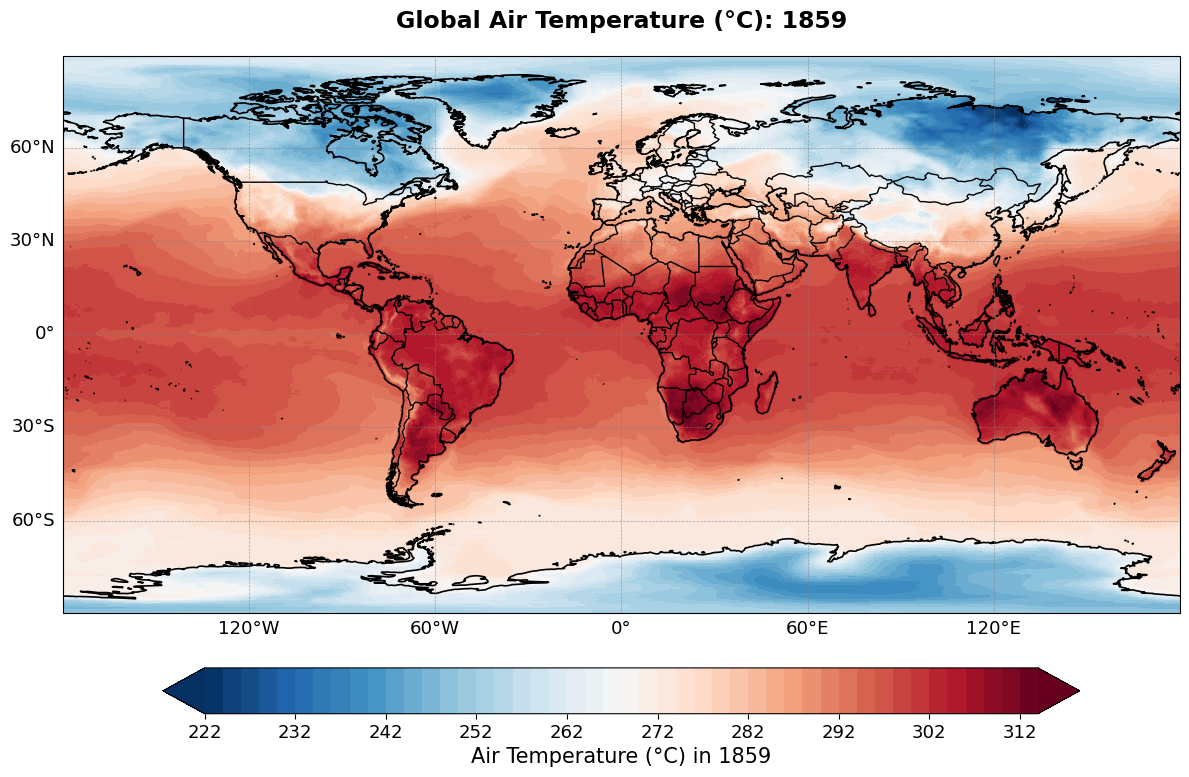

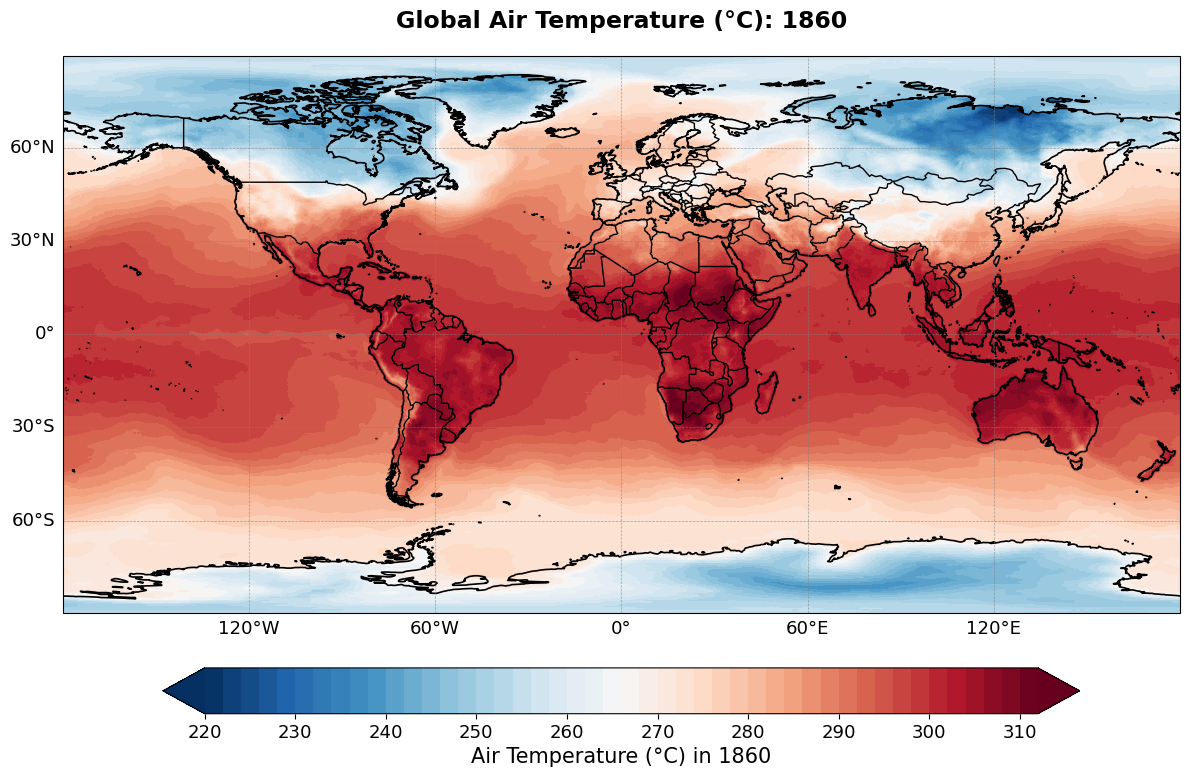

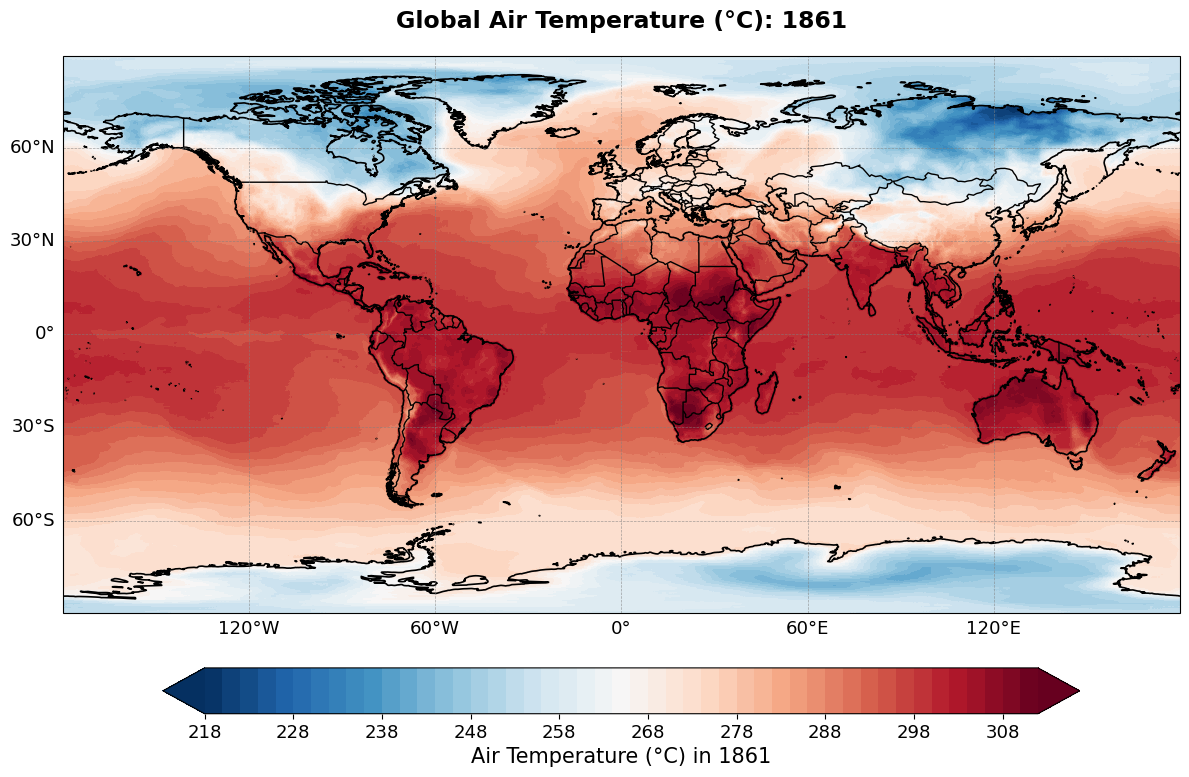

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Assuming 'data.tasmax' is the dataset, where time corresponds to years (e.g., 1851, 1852,...)
years = range(1851, 1862)  # Change this range to the years you want to visualize

# Loop through each year and plot the data for that year
for year_idx, year in enumerate(years):
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])  # Adjust to your region of interest
    
    # Adding coastlines and land features for map aesthetics
    ax.coastlines(resolution='50m', color='black', linewidth=1.2)
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Extract data for the specific year from the dataset
    var = data.tasmax[year_idx, :, :]  # 'year_idx' represents the index for each year in the dataset

    # Use contourf to plot the data
    p = ax.contourf(data.lon, data.lat, var, levels=60, cmap='RdBu_r', transform=ccrs.PlateCarree(), extend='both')

    # Add colorbar with proper labeling
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.06, fraction=0.05)
    cbar.set_label(f"Air Temperature (°C) in {year}", size=15)  # Update label for each year
    cbar.ax.tick_params(labelsize=13)

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                      linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}

    # Set title for each map corresponding to the year
    plt.title(f"Global Air Temperature (°C): {year}", fontsize=17, weight='bold', pad=20)

    # Adjust layout and display/save the plot
    plt.tight_layout()

    plt.show()  # To display each map interactively
    
    # Save each plot with the specified filename format
    year_str = f"{year}-01-01"  # Placeholder date for the format
    fig.savefig(save_location + file_name + year_str + ".png", bbox_inches='tight', dpi=500)

    plt.close()  # Close the figure to save memory
 
